## Exercises

### Import 

In [1]:
import scipy.io
import numpy as np
import matplotlib 
from matplotlib.mlab import *
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy.signal import periodogram, welch, spectrogram


% matplotlib inline

data = loadmat("eeg.mat")
hd,hdh=data['hd'],data['hdh']
rec,rech=data['rec'],data['rech'][0]

### Exercise 1
Let's look at one EEG channel, in row 2 of the matrix rec. Plot the EEG data in rec(2,:) (EEG recording during 24 hours) against time, considering that the sample frequency is fs=100 Hz. You will need to build a vector of times tm that has the same length as rec(2,:) and increases in steps of 1/fs seconds. Plot also the hypnogram in rech against time, considering that sleep stages are scored every 30 seconds. Here you will need a different time vector tmh. 

Text(0,0.5,'recording hypnogram')

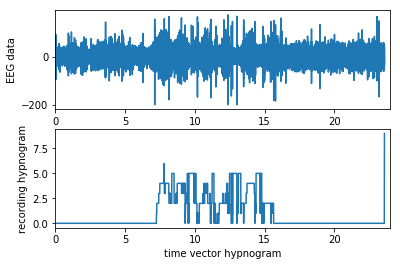

In [2]:
fs = 100 #sample frequency.

data = rec[1,:] # in row two of matrix rec.

tm = np.arange(len(rec[1,:]))*1/fs/60/60 # new vector of times 


plt.subplot(211)# to generate one graph onto another
plt.xlim (0,24)# to enforce the same axis limits
plt.plot(tm, data)
plt.xlabel('time'); plt.ylabel('EEG data') 


fsh = 1/30 # sleep stages are scored in every 30 seconds.

tmh = np.arange(len(rech))/fsh/60/60 # time vector hypnogram

plt.subplot(212)
plt.xlim(0,24)
plt.plot (tmh , rech) ; plt.xlabel ('time vector hypnogram') ; plt.ylabel( 'recording hypnogram')




### Exercise 2

First use periodogram (matlab, python) to obtain the power spectrum of the signal in rec(2,:) (rec[1,:] for python). 
Notice the very noisy aspect of this evaluation. In order to reduce the variance of the power spectrum estimate, we can split our data in smaller pieces (for instance 30 min) and then average together the resulting spectra. This is something that the command pwelch (welch for python) accomplishes automatically for you. You’ll see some sharp peaks at 1 Hz, 2Hz, 3 Hz, 4 Hz, 5Hz and 6 Hz. These are artifacts of the recording equipment. You can readily identify these artifacts because they are singular, sharp events that cannot have a biological origin. Biological rhythms are characterized by broad power peaks, such as what you see at 0.4, 0.8, 1.8, 8 or 13 Hz. Use the command welch to compute power spectrum using the welch method. The most important arguments for this command is the sampling frequency (fs) and the length of each segment on which we want to compute de PS and then average (nperseg). 
It is important to plot using semilogy command, just like in the example. This is because in biology we usually have a lot of power in low frequencies, so for convenience we use the logarithmic transform to compress the points on the y axis. 

Text(0,0.5,'Power Spectrum (microV^2/s)')

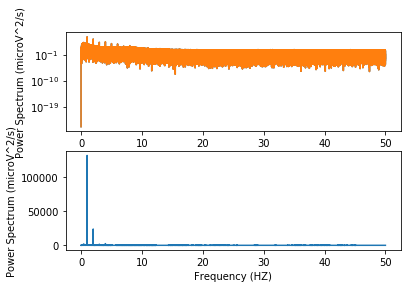

In [3]:
F,Pxx = periodogram (rec[1,:], fs=fs)
plt.subplot(211)
plt.plot(F,Pxx); plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')

plt.semilogy (F,Pxx)
plt.subplot (212)
plt.plot(F,Pxx); plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')




Text(0,0.5,'Power Spectrum (microV^2/s)')

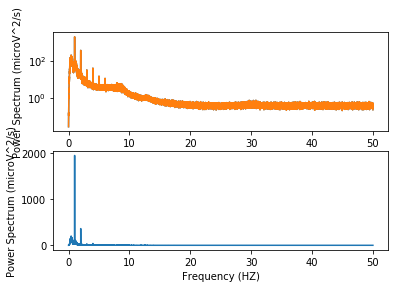

In [4]:
F, Pxx = welch(rec[1,:], fs, nperseg= fs*30*60) # dividing the data into overlapping segments,
#computing a modified periodogram for each segment and averaging the periodograms
plt.subplot(211)
plt.plot(F,Pxx); plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')

plt.semilogy (F,Pxx) # to compress the points on the y axis. 
plt.subplot (212)
plt.plot(F,Pxx); plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')

### Exercise 3 
There is a problem in interpreting the power spectrum obtained in point 2) above: spectral quantities are well defined for stationary signals and our recording has clearly two distinct phases as you see in the graph of point 1 above, the waking and the sleeping phases. You can deal with this by separating in your data (matlab rec(2,:), python rec[1,:]) all the data points that correspond to the waking (0)  phase from the ones that correspond to sleep (not 0). 
Use for this the hypnogram in rech: the time points in which rech is zero correspond to waking and the rest correspond to sleep. You can thus obtain the times of the transitions from waking to sleep and from sleep to waking and use that to cut the data in rec(2,:) into two separate datasets on which to now compute the power spectrum using pwelch as done in point 2 above.

Are the resolutions of both data sets (swdata & recdata) equal: True


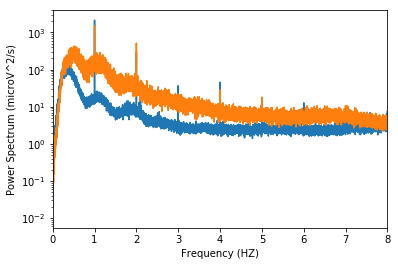

In [5]:
fs=100

recdata= rec[1,:]

swd = [] # binary sleep wake data
swdata =[] # higher res sleep wake data
awakedata=[]
sleepdata=[]

for i in rech[:-1]: #turning hypnogram data to binary 
    if i == 0:
        swd.append(0)
    else:
        swd.append(1)
        
swdata=np.repeat(swd,30*fs) #raising the resolution of slee/wake data to match rec data

print("Are the resolutions of both data sets (swdata & recdata) equal: " + str(len(swdata)==len(recdata)) ) #Checking to see whether both sets have same data points

for i in range(len(swdata)): #Seperating the eeg data into sleepdata and awakedata depending on the corresponding histogram code
    if swdata[i]==0:
        awakedata.append(recdata[i])
    else:
        sleepdata.append(recdata[i])

F1, Pxx1 = welch(awakedata, fs, nperseg= fs*30*60) # Computing the power spectrum
plt.semilogy(F1,Pxx1)

F2, Pxx2 = welch(sleepdata, fs, nperseg= fs*30*60)
plt.semilogy(F2,Pxx2)
plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')
plt.xlim(0,8)
plt.show()


                             


### Exercise 4

The way in which we dealt with non-stationarity in point 3 above was not optimal, because we know that sleep itself is subdivided in phases, so the sleep stage itself cannot be looked at as a stationary signal either. We deal with that by computing power spectra on small windows of data as we slide through the whole dataset. This is what we call a spectrogram. You can directly obtain it with the Matlab command spectrogram . Again use the window size of 30 min as a second argument of this function. Interpret this graph. How do you identify the sleep period from the frequency content in this graph?

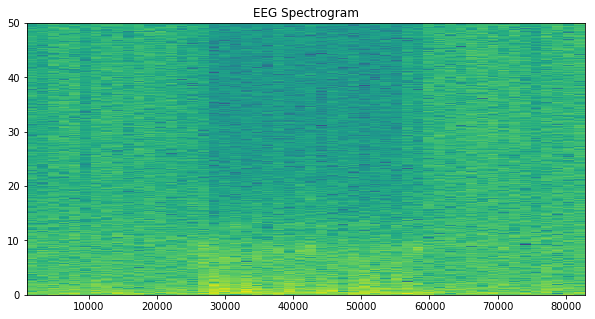

In [6]:
plt.figure(figsize=(10,5))

f, t, Sxx = scipy.signal.spectrogram(recdata, fs=fs, nperseg=30*60*fs)

plt.pcolormesh(t,f, np.log(Sxx))
plt.title('EEG Spectrogram')
plt.show()

### Exercise 5
Similar to 3) above, we could now use the hypnogram in rech to separate the data points that come from periods identified as NREM1-2, NREM 3-4 and REM. Plot the power spectra of these different periods using pwelch (or you can also do it from the power matrix returned by spectrogram). Can you see the hallmarks of the various rhythms described in the introduction to this assignment?

In [7]:
sdata=np.repeat(rech[:-1],30*fs)
s0=[]
s1=[]
s2=[]
s3=[]
s4=[]
s5=[]
s6=[]

for i in range(len(sdata)):  #Seperating the data using the same technique as 3rd Exercise
    if sdata[i]==0:
        s0.append(recdata[i])
    elif sdata[i]==1:
        s1.append(recdata[i])
    elif sdata[i]==2:
        s2.append(recdata[i])
    elif sdata[i]==3:
        s3.append(recdata[i])
    elif sdata[i]==4:
        s4.append(recdata[i])
    elif sdata[i]==5:
        s5.append(recdata[i])
    elif sdata[i]==6:
        s6.append(recdata[i])
        
print(len(s0),len(s1),len(s2),len(s3),len(s4),len(s5),len(s6))

5655000 177000 1119000 282000 609000 645000 3000


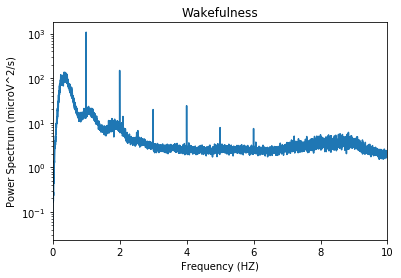

In [8]:
F0, Pxx0 = welch(s0, fs, nperseg= fs*30*30)
plt.semilogy(F0,Pxx0)
plt.xlim(0,10)
plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')
plt.title('Wakefulness')
plt.plot()
plt.show()


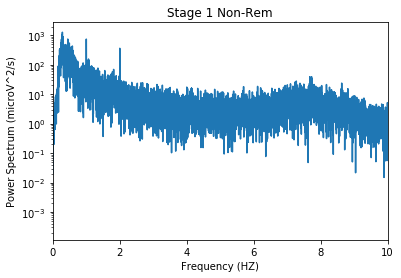

In [9]:
F1, Pxx1 = welch(s1, fs, nperseg= fs*30*30)
plt.semilogy(F1,Pxx1)
plt.xlim(0,10)
plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')
plt.title('Stage 1 Non-Rem')
plt.plot()
plt.show()

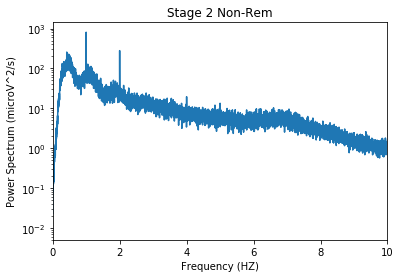

In [10]:
F2, Pxx2 = welch(s2, fs, nperseg= fs*30*30)
plt.semilogy(F2,Pxx2)
plt.xlim(0,10)
plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')
plt.title('Stage 2 Non-Rem')
plt.plot()
plt.show()

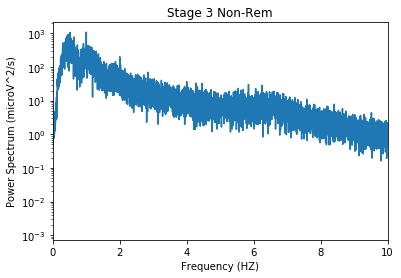

In [11]:
F3, Pxx3 = welch(s3, fs, nperseg= fs*30*30)
plt.semilogy(F3,Pxx3)
plt.xlim(0,10)
plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')
plt.title('Stage 3 Non-Rem')
plt.plot()
plt.show()

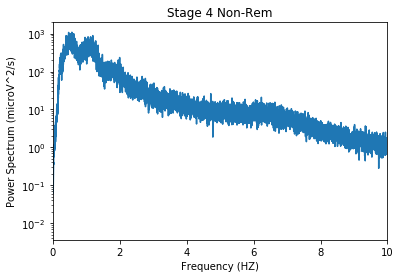

In [12]:
F4, Pxx4 = welch(s4, fs, nperseg= fs*30*30)
plt.semilogy(F4,Pxx4)
plt.xlim(0,10)
plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')
plt.title('Stage 4 Non-Rem')
plt.plot()
plt.show()


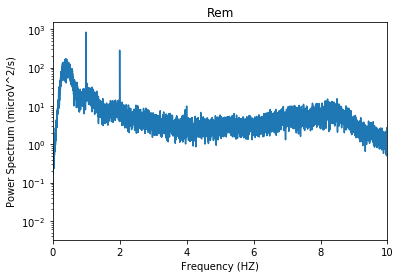

In [13]:
F5, Pxx5 = welch(s5, fs, nperseg= fs*30*30)
plt.semilogy(F5,Pxx5)
plt.xlim(0,10)
plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')
plt.title('Rem')
plt.plot()
plt.show()


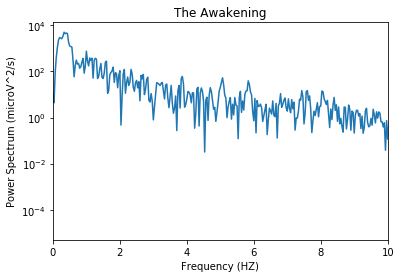

In [14]:
F6, Pxx6 = welch(s6, fs, nperseg= fs*30)
plt.semilogy(F6,Pxx6)
plt.xlim(0,10)
plt.xlabel('Frequency (HZ)'); plt.ylabel('Power Spectrum (microV^2/s)')
plt.title('The Awakening')
plt.plot()
plt.show()